In [90]:
# Dependencies
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px

In [91]:
# Name of the CSV file
file = Path('Resources/Video_Games.csv')

In [92]:
# build df from .csv with encoding
df = pd.read_csv(file, encoding="ISO-8859-1")
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [93]:
#clean data - remove null values in Year of Release and publisher, change year type from float to int
df = df[(df.Year_of_Release.notnull()) & (df.Publisher.notnull())]
df['Year_of_Release'] = df['Year_of_Release'].astype('int')

In [94]:
#Define different dataframes (Will be used seperately for different tasks/analysis by each team member)

#Define dataframe for data on game release year only
# game_releases_df = game_2k_df[['Name','Year_of_Release']]


#Define a dataframe that contains data from year 2000 and later, drop data for 2017 and later. (Little to no useful data from 2017+)
game_2k_df = df.loc[(df['Year_of_Release'] >= 2000) & (df['Year_of_Release'] < 2017), :]

#Define dataframe for data on video game sales.
gs_df = game_2k_df[['Name','Year_of_Release','Platform','NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']]

In [95]:
#define new df to pull values of the games with the most global sales per platform
gmax = pd.DataFrame(gs_df.groupby('Platform')['Global_Sales'].max())

#merge the data and parse to retrieve only desired data
top_games2k_df = pd.merge(gs_df, gmax, how='inner', on=['Platform','Global_Sales'])
top_global_df = check[['Name', 'Platform', 'Year_of_Release','Global_Sales']]
top_global_df

,Name,Platform,Year_of_Release,Global_Sales
0,Wii Sports,Wii,2006,82.53
1,New Super Mario Bros.,DS,2006,29.80
2,Kinect Adventures!,X360,2010,21.81
3,Grand Theft Auto V,PS3,2013,21.04
4,Grand Theft Auto: San Andreas,PS2,2004,20.81
5,Pokemon Ruby/Pokemon Sapphire,GBA,2002,15.85
6,Call of Duty: Black Ops 3,PS4,2015,14.63
7,Pokemon X/Pokemon Y,3DS,2013,14.60
8,Halo 2,XB,2004,8.49
9,The Sims 3,PC,2009,8.01


In [96]:
#Parse data into dataframe to analyze platform sales data.
sorted_df = game_2k_df[['Platform','Year_of_Release', 'Global_Sales']].sort_values(by=['Year_of_Release'])
groups = pd.DataFrame(sorted_df.groupby(['Platform', 'Year_of_Release'])['Global_Sales'].sum())
groups

Global_Sales
Platform Year_of_Release              
3DS      2011                    63.17
         2012                    51.36
         2013                    56.64
         2014                    43.80
         2015                    27.81
...                                ...
XB       2008                     0.18
XOne     2013                    18.94
         2014                    54.14
         2015                    60.09
         2016                    26.27

[150 rows x 1 columns]

In [97]:
#List for unique years and unique platforms.
years = []
for year in sorted_df['Year_of_Release']:
    if year not in years:
        years.append(year)
        
print(years)

platforms = []

for platform in sorted_df['Platform']:
    if platform not in platforms:
        platforms.append(platform)
        
print(platforms)

[2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]
['PS2', 'N64', 'PS', 'DC', 'GBA', 'GB', 'PC', 'XB', 'WS', 'GC', 'DS', 'PSP', 'X360', 'Wii', 'PS3', '3DS', 'PSV', 'WiiU', 'PS4', 'XOne']


In [98]:
#Dictionary that holds data for global sales per platform, per year and convert to df, set index to years
data = {
        x: [sorted_df[(sorted_df['Year_of_Release'] == y)  & (sorted_df['Platform'] == x)]['Global_Sales'].sum() for y in years]
        for x in platforms
    }

data_df = pd.DataFrame(data)
data_df ['Year'] = years
data_df.set_index('Year',inplace=True)
data_df

,PS2,N64,PS,DC,GBA,GB,PC,XB,WS,GC,DS,PSP,X360,Wii,PS3,3DS,PSV,WiiU,PS4,XOne
Year,,,,,,,,,,,,,,,,,,,,
2000,39.11,34.01,96.30,5.99,0.06,19.76,4.68,0.99,0.68,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2001,166.43,3.26,35.52,1.07,61.62,9.24,5.51,22.24,0.28,26.30,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2002,205.40,0.08,6.69,0.29,74.38,0.00,8.59,48.15,0.00,51.93,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2003,184.29,0.00,2.05,0.00,56.73,0.00,8.91,55.16,0.00,50.66,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2004,211.78,0.00,0.00,0.00,72.79,0.00,10.41,65.50,0.00,28.89,17.27,7.11,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2005,160.65,0.00,0.00,0.00,32.47,0.00,4.41,49.17,0.00,27.80,130.22,43.89,8.27,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2006,103.42,0.00,0.00,0.00,5.35,0.00,2.91,10.15,0.00,11.29,119.92,55.45,51.66,137.12,20.95,0.00,0.00,0.00,0.00,0.00
2007,76.00,0.00,0.00,0.02,2.22,0.00,9.33,0.55,0.00,0.27,147.26,47.05,95.43,152.89,73.14,0.00,0.00,0.00,0.00,0.00
2008,53.83,0.00,0.00,0.04,0.00,0.00,12.59,0.18,0.00,0.00,145.45,34.52,135.25,171.45,118.48,0.00,0.00,0.00,0.00,0.00


In [99]:
#Sales Data for each platform
for platform in platforms:
    pmax = data_df[platform].max()
    psum = data_df[platform].sum()
    pindex = data_df[data_df[platform] == pmax].index[0]
    
          
    
    
    print(f'{platform}')
    print(f'Highest Selling year: {pindex} with {pmax} games sold')
    print(f'Total lifetime sales: {psum}')
    print()

PS2
Highest Selling year: 2004 with 211.77999999999997 games sold
Total lifetime sales: 1233.46

N64
Highest Selling year: 2000 with 34.01 games sold
Total lifetime sales: 37.349999999999994

PS
Highest Selling year: 2000 with 96.30000000000001 games sold
Total lifetime sales: 140.56

DC
Highest Selling year: 2000 with 5.99 games sold
Total lifetime sales: 7.41

GBA
Highest Selling year: 2002 with 74.38 games sold
Total lifetime sales: 305.62

GB
Highest Selling year: 2000 with 19.76 games sold
Total lifetime sales: 29.0

PC
Highest Selling year: 2011 with 34.91 games sold
Total lifetime sales: 206.19

XB
Highest Selling year: 2004 with 65.5 games sold
Total lifetime sales: 252.09

WS
Highest Selling year: 2000 with 0.68 games sold
Total lifetime sales: 0.9600000000000001

GC
Highest Selling year: 2002 with 51.93000000000001 games sold
Total lifetime sales: 197.14000000000001

DS
Highest Selling year: 2007 with 147.26 games sold
Total lifetime sales: 803.4199999999998

PSP
Highest Sell

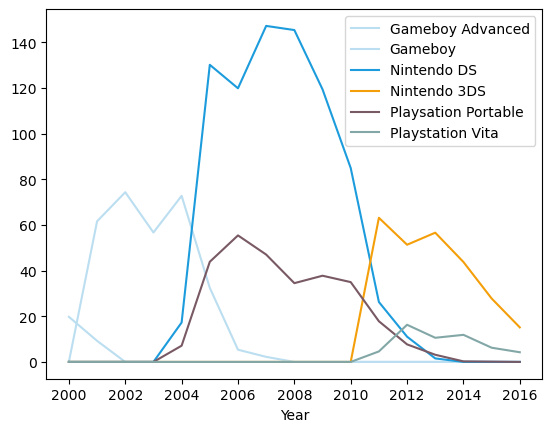

In [100]:
#plot linechart for handheld devices
handheld_df = data_df[['GBA', 'GB', 'DS','3DS','PSP','PSV']].copy()
handheld_df.columns = ['Gameboy Advanced', 'Gameboy', 'Nintendo DS', 'Nintendo 3DS','Playsation Portable', 'Playstation Vita']
handheld_df.plot(color=['#BBDEF0','#BBDEF0','#1C9CDC','#F49F0A','#785964','#82A7A6'])
plt.show()

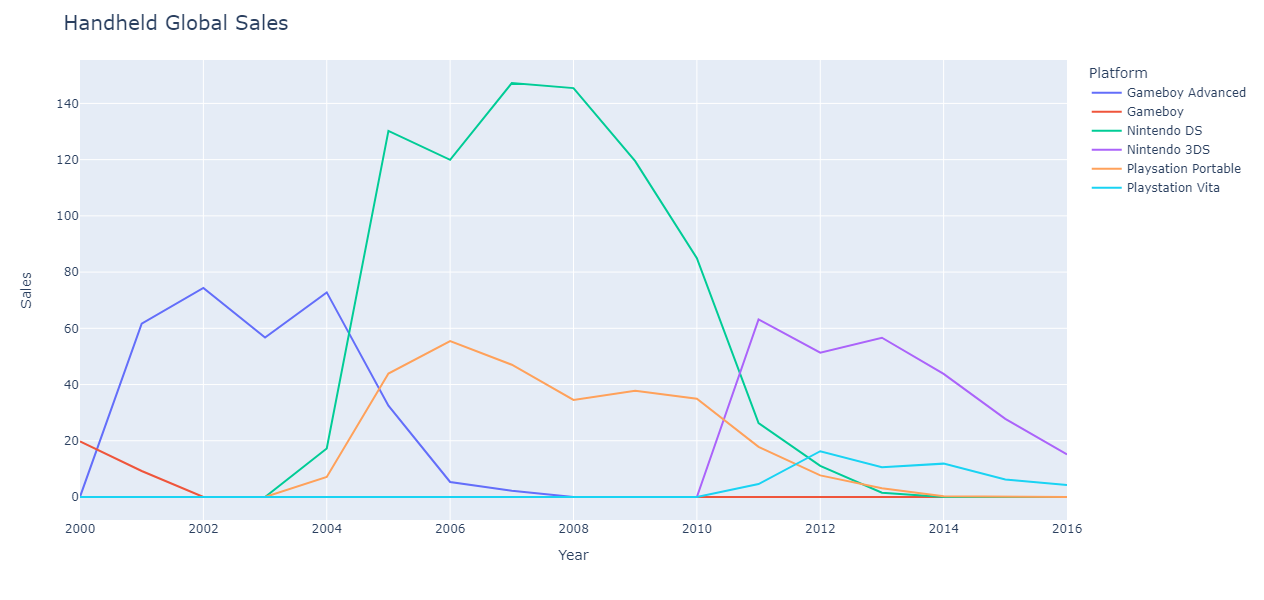

In [101]:
#dataframe for handheld devices
handheld_long_df = handheld_df.unstack().reset_index()
handheld_long_df.columns=['Platform','Year','Sales']

#plotly graph
fig = px.line(handheld_long_df, x="Year", y="Sales", color='Platform', height=600)
fig.update_layout(title=dict(text="Handheld Global Sales", font=dict(size=20)))
fig.show()

<Axes: xlabel='Year'>

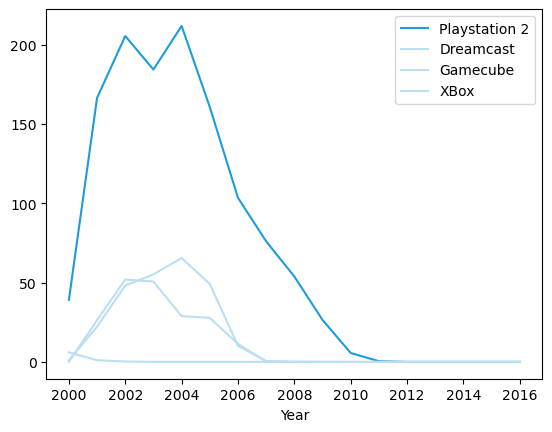

In [102]:
##plot linechart for sixth gen devices
gensix_df = data_df[['PS2', 'DC', 'GC','XB']].copy()
gensix_df.columns = ['Playstation 2', 'Dreamcast', 'Gamecube', 'XBox']
gensix_df.plot(color=['#1C9CDC','#BBDEF0','#BBDEF0','#BBDEF0'])

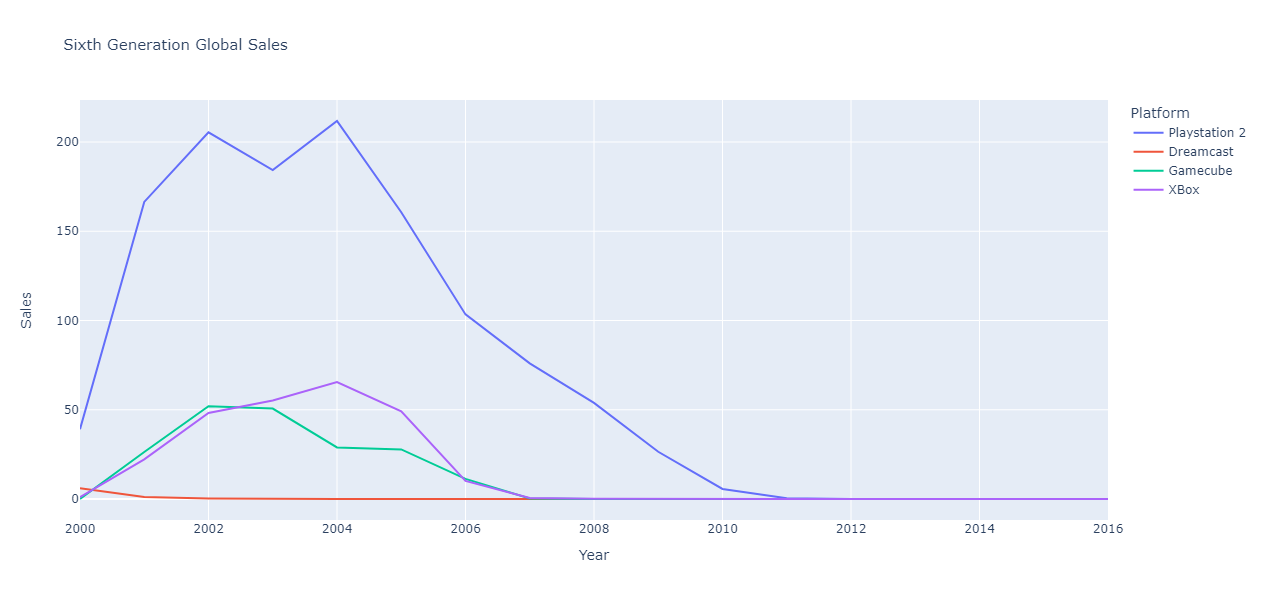

In [103]:
#dataframe for sixth gen devices
gensix_long_df = gensix_df.unstack().reset_index()
gensix_long_df.columns=['Platform','Year','Sales']

#plotly graph for gen six
fig = px.line(gensix_long_df, x="Year", y="Sales", color='Platform',title = "Sixth Generation Global Sales", height=600)
fig.update_layout(title=dict(text="Sixth Generation Global Sales", font=dict(size=15)))
fig.show()

<Axes: xlabel='Year'>

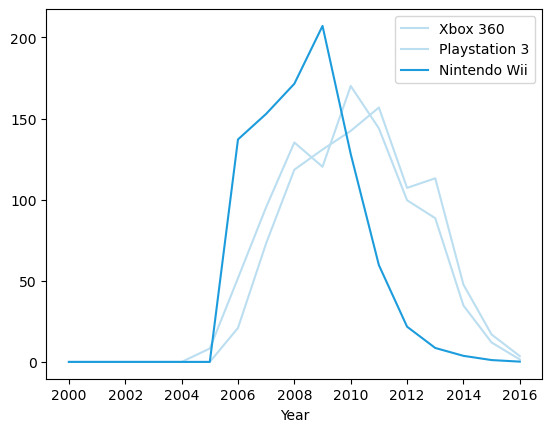

In [104]:
##plot linechart for seventh gen devices
genseven_df = data_df[['X360', 'PS3', 'Wii']].copy()
genseven_df.columns = ['Xbox 360', 'Playstation 3', 'Nintendo Wii']
genseven_df.plot(color=['#BBDEF0','#BBDEF0','#1C9CDC'])

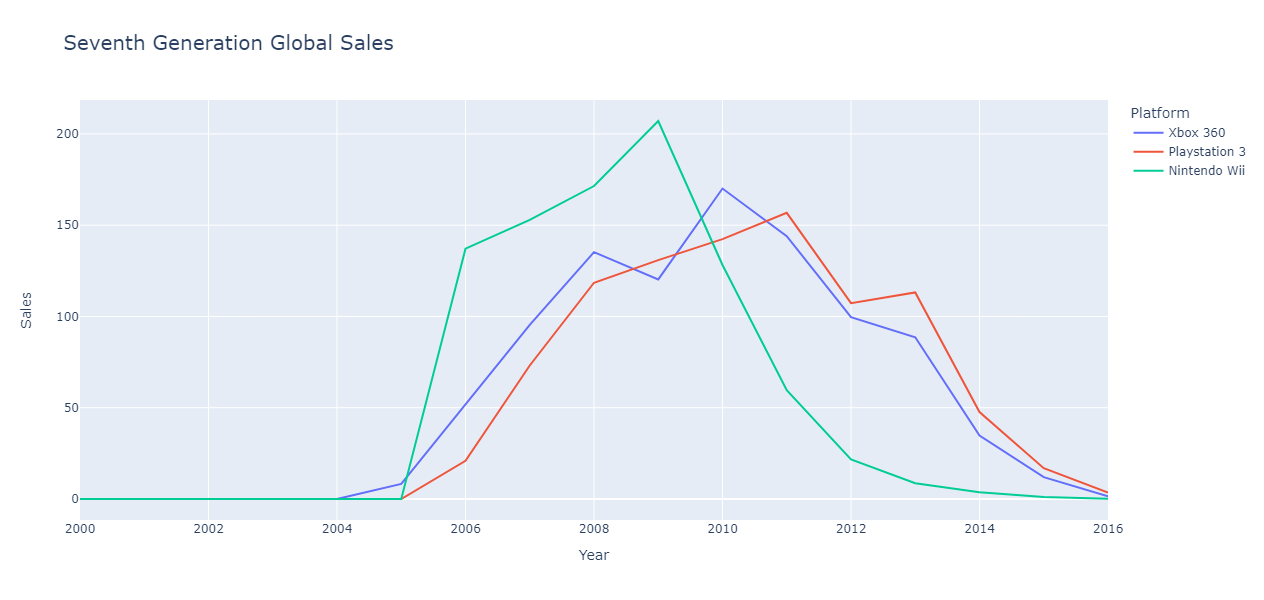

In [105]:
#dataframe for seventh gen devices
genseven_long_df = genseven_df.unstack().reset_index()
genseven_long_df.columns=['Platform','Year','Sales']

#plotly graph for gen seven
fig = px.line(genseven_long_df, x="Year", y="Sales", color='Platform', title = "Seventh Generation Global Sales", height=600)
fig.update_layout(title=dict(text="Seventh Generation Global Sales", font=dict(size=20)))
fig.show()

<Axes: xlabel='Year'>

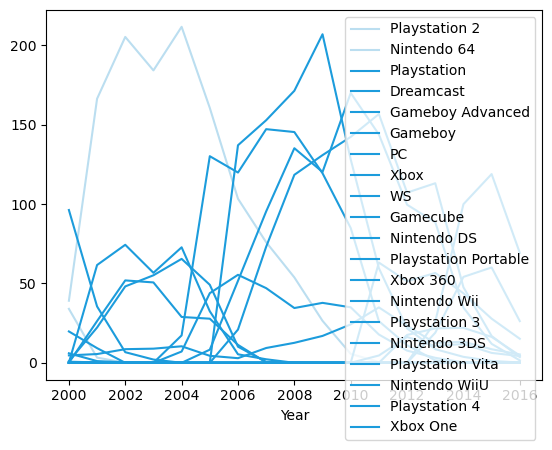

In [106]:

#Dataframe and graphs for all consoles 2000 - 2017
all_df = data_df[['PS2', 'N64', 'PS', 'DC', 'GBA', 'GB', 'PC', 'XB', 'WS', 'GC', 'DS', 'PSP', 'X360', 'Wii', 'PS3', '3DS', 'PSV', 'WiiU', 'PS4', 'XOne']].copy()
all_df.columns = ['Playstation 2',
                  'Nintendo 64',
                  'Playstation',
                  'Dreamcast',
                  'Gameboy Advanced',
                  'Gameboy',
                  'PC',
                  'Xbox',
                  'WS',
                  'Gamecube',
                  'Nintendo DS',
                  'Playstation Portable',
                  'Xbox 360',
                  'Nintendo Wii',
                  'Playstation 3',
                  'Nintendo 3DS',
                  'Playstation Vita',
                  'Nintendo WiiU',
                  'Playstation 4',
                  'Xbox One']

all_df.plot(color=['#BBDEF0',
                   '#BBDEF0',
                   '#1C9CDC',
                   '#1C9CDC',
                   '#1C9CDC',
                   '#1C9CDC',
                   '#1C9CDC',
                   '#1C9CDC',
                   '#1C9CDC',
                   '#1C9CDC',
                   '#1C9CDC',
                   '#1C9CDC',
                   '#1C9CDC',
                   '#1C9CDC',
                   '#1C9CDC',
                   '#1C9CDC',
                   '#1C9CDC',
                   '#1C9CDC',
                   '#1C9CDC',
                   '#1C9CDC',
                   '#1C9CDC',
                   '#1C9CDC'])

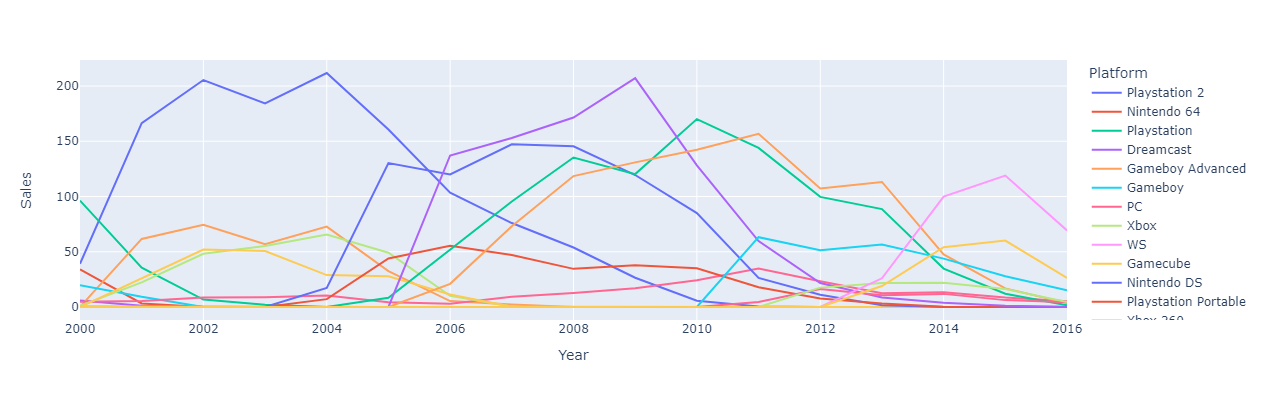

In [107]:
all_long_df = all_df.unstack().reset_index()
all_long_df.columns=['Platform','Year','Sales']

fig = px.line(all_long_df, x="Year", y="Sales", color='Platform',height=400)
fig.show()

In [108]:
#critic and user score data (Additional exploratory analysis)
print("Max number of critic reviews : " + str(df['Critic_Count'].max()))
print("Min number of critic reviews : " + str(df['Critic_Count'].min()))
print("Avg number of critic reviews : " + str(df['Critic_Count'].mean()))
print("Max number of user reviews : " + str(df['User_Count'].max()))
print("Min number of user reviews : " + str(df['User_Count'].min()))
print("Avg number of user reviews : " + str(df['User_Count'].mean()))

print('*'*80)
scores_df = game_2k_df[['Name','Genre','Year_of_Release','Global_Sales', 'Critic_Score','Critic_Count', 'User_Score', 'User_Count']]
scores_df = scores_df.dropna()
user_count_df = scores_df.sort_values(by=['User_Count'], ascending=False)

print(user_count_df.head())
print('*'*80)

df.loc[(df['Year_of_Release'] >= 2000) & (df['Year_of_Release'] < 2017), :]

critics_df = scores_df.loc[scores_df['Critic_Count'] >= 50, :]
users_df = scores_df.loc[scores_df['User_Count'] >= 150, :]

users_df.info()

Max number of critic reviews : 113.0
Min number of critic reviews : 3.0
Avg number of critic reviews : 26.440992232523175
Max number of user reviews : 10665.0
Min number of user reviews : 4.0
Avg number of user reviews : 163.0088459991958
********************************************************************************
                              Name         Genre  Year_of_Release  \
2851      The Witcher 3: Wild Hunt  Role-Playing             2015   
303       The Witcher 3: Wild Hunt  Role-Playing             2015   
11288       Counter-Strike: Source       Shooter             2004   
192                     Diablo III  Role-Playing             2012   
313    The Elder Scrolls V: Skyrim  Role-Playing             2011   

       Global_Sales  Critic_Score  Critic_Count User_Score  User_Count  
2851           0.72          93.0          32.0        9.3     10665.0  
303            3.97          92.0          79.0        9.2     10179.0  
11288          0.08          88.0           9.

In [109]:
gs_df

,Name,Year_of_Release,Platform,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,2006,Wii,41.36,28.96,3.77,8.45,82.53
2,Mario Kart Wii,2008,Wii,15.68,12.76,3.79,3.29,35.52
3,Wii Sports Resort,2009,Wii,15.61,10.93,3.28,2.95,32.77
6,New Super Mario Bros.,2006,DS,11.28,9.14,6.50,2.88,29.80
7,Wii Play,2006,Wii,13.96,9.18,2.93,2.84,28.92
...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,2016,PS3,0.00,0.00,0.01,0.00,0.01
16715,LMA Manager 2007,2006,X360,0.00,0.01,0.00,0.00,0.01
16716,Haitaka no Psychedelica,2016,PSV,0.00,0.00,0.01,0.00,0.01
16717,Spirits & Spells,2003,GBA,0.01,0.00,0.00,0.00,0.01


In [110]:
regions = ['NA_Sales', 'EU_Sales','JP_Sales', 'Other_Sales']
reg_sales = []
for r in regions:
    reg_sales.append(gs_df[r].sum())

reg_sales

[3523.86, 2083.22, 815.79, 728.0100000000001]

In [111]:
def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d} units)".format(pct, absolute)

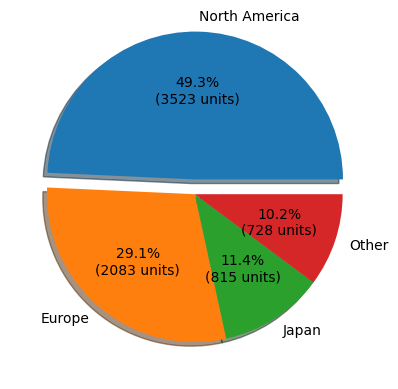

In [116]:
mylabels = ['North America', 'Europe', 'Japan', 'Other']
explode = (0.1,0,0,0)
plt.pie(reg_sales, labels = mylabels,explode = explode, shadow=True, autopct=lambda pct: func(pct, reg_sales))
plt.savefig("Output/Fig8.png")
plt.show() 
